## Program to Predict Air Cargo Loaded in Singapore using RNN

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/pui-user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
# Assigning a random seed for reproducability
np.random.seed(666)

In [12]:
# Loading the File
dataframe = pd.read_csv('total-air-cargo-loaded.csv', \
                        usecols=[1], engine='python', skipfooter=3)

In [13]:
#Converting to a Float datatype to convert to Numpy Array
dataset = dataframe.values
dataset = dataset.astype('float32')t

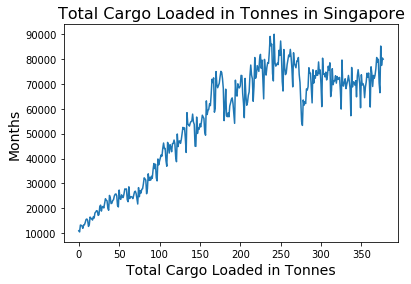

In [27]:
plt.plot(dataset)
plt.xlabel('Total Cargo Loaded in Tonnes', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Cargo Loaded in Tonnes in Singapore', fontsize = 16)
plt.show()

### Fig.1: This figure shows the overall Air Cargo Loaded in Singapore in tonnes as a function of months.

In [34]:
# Assigning Range
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [35]:
#Dividing Training and Test Sample
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print ("train_data_size: " + str(len(train)), " test_data_size: "+str(len(test)))

train_data_size: 253  test_data_size: 125


In [40]:
#Function to Create Nump Dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
# Assigning X to t and Y to t+!
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [46]:
# Reshaping the Array
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [47]:
#Creating the LSTM model and fitting to it
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pui-user/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 1s - loss: 0.0945
Epoch 2/100
 - 1s - loss: 0.0294
Epoch 3/100
 - 1s - loss: 0.0194
Epoch 4/100
 - 0s - loss: 0.0115
Epoch 5/100
 - 0s - loss: 0.0064
Epoch 6/100
 - 0s - loss: 0.0042
Epoch 7/100
 - 1s - loss: 0.0035
Epoch 8/100
 - 0s - loss: 0.0034
Epoch 9/100
 - 0s - loss: 0.0033
Epoch 10/100
 - 0s - loss: 0.0033
Epoch 11/100
 - 0s - loss: 0.0034
Epoch 12/100
 - 0s - loss: 0.0033
Epoch 13/100
 - 0s - loss: 0.0033
Epoch 14/100
 - 0s - loss: 0.0034
Epoch 15/100
 - 1s - loss: 0.0033
Epoch 16/100
 - 1s - loss: 0.0034
Epoch 17/100
 - 1s - loss: 0.0033
Epoch 18/100
 - 1s - loss: 0.0034
Epoch 19/100
 - 0s - loss: 0.0034
Epoch 20/100
 - 0s - loss: 0.0034
Epoch 21/100
 - 0s - loss: 0.0033
Epoch 22/100
 - 1s - loss: 0.0033
Epoch 23/100
 - 0s - loss: 0.0033
Epoch 24/100
 - 0s - loss: 0.0034
Epoch 25/100
 - 0s - loss: 0.0033
Epoch 26/100
 - 0s - loss: 0.0034
Epoch 27/100
 - 0s - loss: 0.0033
Epoch 28/100
 - 0s - loss: 0.0034
Epoch 29/100
 - 0s - loss: 0.0033
Epoch 30/100
 - 0s - lo

In [48]:
#Creating PRediction Results
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [49]:
#Inverting the Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [25]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

[ 10515.00016991  13278.99950933  13153.99947243  12897.00013482
  11953.99959143  13314.00056079  13385.00002332  14312.99994707
  15516.99991443  15702.00006369  15162.00023555  12720.9998841
  13446.99958731  16480.99943235  15883.9998524   15874.00022804
  15280.99955135  16578.99977362  16080.00053494  18113.00035896
  18518.00052584  19049.00045544  18911.00043363  17143.00011994
  17452.00058029  20715.00034149  21265.9995198   18870.99956998
  20544.99962876  20734.00104749  20142.00009662  21905.00059812
  23850.00088834  23218.99998274  23027.00056967  19973.99883552
  19220.99943668  25170.00099406  24149.99908393  21890.00116159
  22061.99895973  23098.99975802  23469.00005654  24935.9988995
  25630.99882072  25777.99992418  25032.00097225  21070.99974618
  20560.99997422  27328.99939769  23949.99949813  23589.00028126
  25417.00070731  24389.00099066  24337.99959374  25781.00028473
  27786.00068731  27680.99989912  27791.99904219  23449.99935053
  22650.99955005  28622.999

In [61]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4903.41 RMSE
Test Score: 6222.83 RMSE


In [58]:
# Shift Dataset to Plot
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [62]:
#Shift Prediction to plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

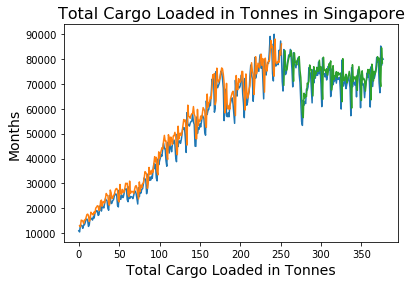

In [66]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Total Cargo Loaded in Tonnes', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Total Cargo Loaded in Tonnes in Singapore', fontsize = 16)
plt.show()


### Fig.2: This figure shows the actual and predicted values of the overall cargo loaded in Singapore based on the model. The plot in Blue is the actual value, the plot in orange is for the training data and the plot in Green is for the Prediction data